In [1]:

# use DUFReport interpreter settings
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# displays logos inline within the notebook;
# remove if using a python interpreter instead
%matplotlib inline
plt.ion

# logomaker import
import logomaker as lm

In [25]:
def make_dir(dir_name):
    try:
        os.mkdir(f'{dir_name}')
        return dir_name
    except:
        pass
        return dir_name

def make_logo(matrix_df,shift=0):
    if shift != 0:
        matrix_df = matrix_df.set_index(matrix_df.index + shift)
    norm_mat_in = matrix_df
    # norm_mat_in = lm.transform_matrix(matrix_df, normalize_values=True)

    logo = lm.Logo(norm_mat_in,
                fade_probabilities=True,
                stack_order='small_on_top',
                font_name='Arial Rounded MT Bold',
                color_scheme='black',
                edgecolor='black',
                edgewidth=0.2)
    return logo

def style_logo_magenta(logo, style_string):
    logo.style_glyphs_in_sequence(f'{style_string}',
                                color='magenta')
    logo.ax.set_xlabel('Position',fontsize=24)
    logo.ax.set_ylabel("Probability", labelpad=-1,fontsize=24)
    logo.ax.tick_params(axis="x", labelsize=18)
    logo.ax.tick_params(axis="y", labelsize=18)  

    return logo

def make_norm_logo(matrix_df,shift=0, position=[]):
    matrix_df = lm.transform_matrix(matrix_df, normalize_values=True)
    if shift != 0:
        matrix_df = matrix_df.set_index(matrix_df.index + shift)
    norm_mat_in = matrix_df
    # norm_mat_in = lm.transform_matrix(matrix_df, normalize_values=True)

    logo = lm.Logo(norm_mat_in,
                fade_probabilities=True,
                stack_order='small_on_top',
                font_name='Arial Rounded MT Bold',
                color_scheme='dmslogo_funcgroup',
                edgecolor='black',
                edgewidth=0.2)
    if position != []:
        for pos in position:
            logo.highlight_position(p=pos, color='magenta', alpha=0.1)
    return logo

def make_unorm_logo(matrix_df,shift=0, position=[]):
    if shift != 0:
        matrix_df = matrix_df.set_index(matrix_df.index + shift)
    norm_mat_in = matrix_df
    # norm_mat_in = lm.transform_matrix(matrix_df, normalize_values=True)

    logo = lm.Logo(norm_mat_in,
                fade_probabilities=True,
                stack_order='small_on_top',
                font_name='Arial Rounded MT Bold',
                color_scheme='dmslogo_funcgroup',
                edgecolor='black',
                edgewidth=0.2)
    if position != []:
        for pos in position:
            logo.highlight_position(p=pos, color='magenta', alpha=0.1)
    return logo


def save_logo_svg(logo, output_path, output_name):
    logo
    plt.savefig(f"{output_path}/{output_name}_Logo.svg",
                bbox_inches='tight',
                pad_inches=0.1)
    return

def skylign_data_to_df(skylign_file):
    with open(skylign_file) as f:
        rows = []
        lines = f.readlines()
        for i in range(len(lines)):
            if i == 3:
                line = lines[i].split("\t")
                cols = (line[:])
            elif i > 3:
                line = lines[i].split("\t")
                rows.append(line[:21])
        # print(cols)
        df = pd.DataFrame(rows, columns=cols).drop(columns=['#       ']).rename(columns={"Y\n" : "Y"})
        df = df.astype(float)
        return df
    
def compute_sum_of_rows(matrix_df):
    # sum each row and create a line graph of the sums by index
    print("Summing rows")
    matrix_df["sum"] = matrix_df.sum(axis=1)
    sum_df = matrix_df["sum"]
    print("Windowing")
    return sum_df

def make_conservation_score_chart(sum_df):
    window_size = int(len(sum_df)//((94//7)))
    rolling_df = sum_df.rolling(window=window_size).mean()
    plt.plot(rolling_df)
    plt.xlabel('Position')
    plt.ylabel('Conservation Score')
    # draw a horizontal line on the graph at the data's 75th quantile
    plt.axhline(y=high_rolling_df.quantile([0.75]), color='r', linestyle='-') 
    plt.show()
    return rolling_df

# plot the line graph
# roll_df = make_line_graph(matrix_l3))
# roll_df.quantile([0.25, 0.5, 0.7])

In [3]:
cwd = os.getcwd()
output_path = make_dir(cwd + "/output_Logos")
input_dfs = glob.glob("skylign/*.txt") # paths to the matrices

# print(input_dfs)

matrix_gc, matrix_sir = skylign_data_to_df(input_dfs[0]), skylign_data_to_df(input_dfs[1])


# SIR_0168 logos

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...
in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...
in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


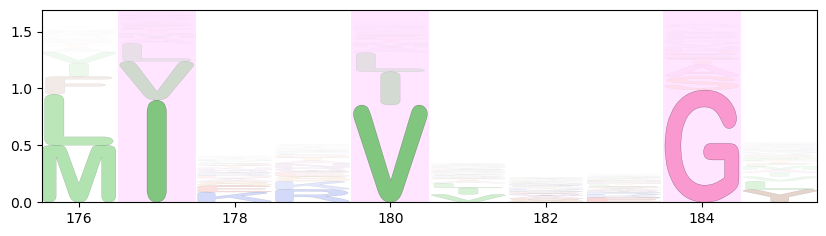

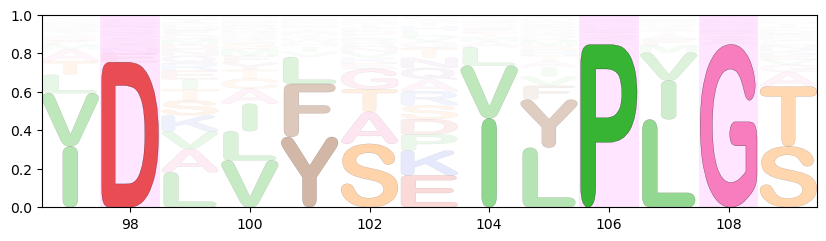

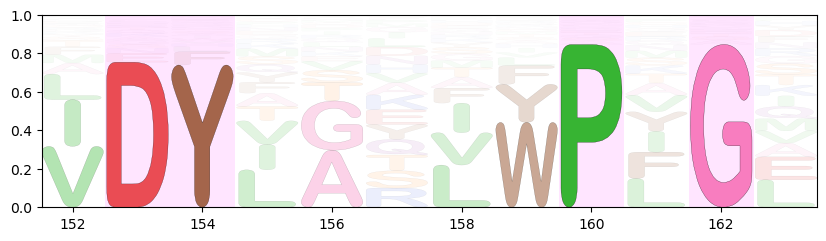

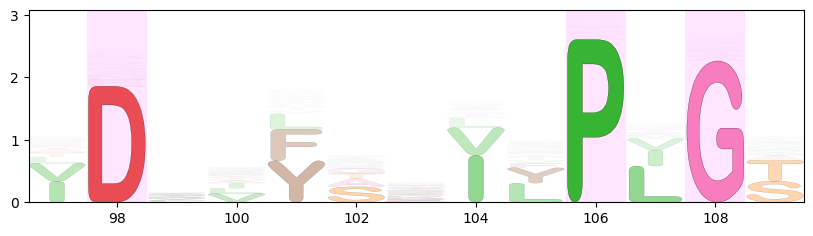

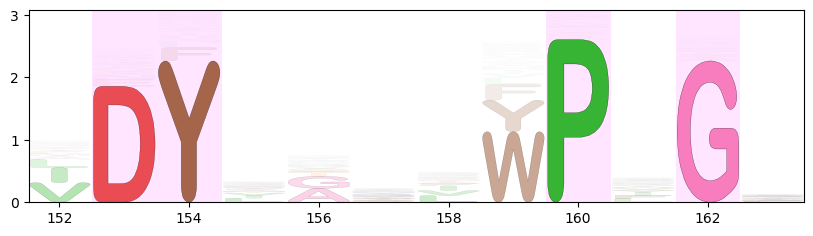

In [31]:

# n_matrix_sir = lm.transform_matrix(matrix_sir, normalize_values=True)
m1 = matrix_sir.iloc[177:187]
m2 = matrix_sir.iloc[98:111]
m3 = matrix_sir.iloc[153:165]

unorm_motif1 = make_unorm_logo(m1, shift=-1, position=[177,180,184])
save_logo_svg(norm_motif1, "output_Logos", "SIR_0168_Motif1_unormed")


norm_motif2 = make_norm_logo(m2, shift=-1, position=[98,106,108])
save_logo_svg(norm_motif2, "output_Logos", "SIR_0168_Motif2_normed")

norm_motif3 = make_norm_logo(m3, shift=-1, position=[153,154,160,162])
save_logo_svg(norm_motif3, "output_Logos", "SIR_0168_Motif3_normed")

unorm_motif2 = make_unorm_logo(m2, shift=-1, position=[98,106,108])
save_logo_svg(unorm_motif2, "output_Logos", "SIR_0168_Motif2_unormed")

unorm_motif3 = make_unorm_logo(m3, shift=-1, position=[153,154,160,162])
save_logo_svg(unorm_motif3, "output_Logos", "SIR_0168_Motif3_unormed")


# # motif1 = make_logo(m1)
# motif2 = make_logo(m2, shift=-1)
# styled_motif2 = style_logo_magenta(motif2, ".D.......P.G.")
# save_logo_svg(styled_motif2, "output_Logos", "SIR_0168_Motif2")

# motif3 = make_logo(m3,shift=-1)
# # styled_motif1 = style_logo_magenta(motif1, "........G.")
# styled_motif3 = style_logo_magenta(motif3, ".DY....YP.G.")
# # save_logo_svg(styled_motif1, "output_Logos", "SIR_0168_Motif1")
# save_logo_svg(styled_motif3, "output_Logos", "SIR_0168_Motif3")


# GC1825

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...
in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...
in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


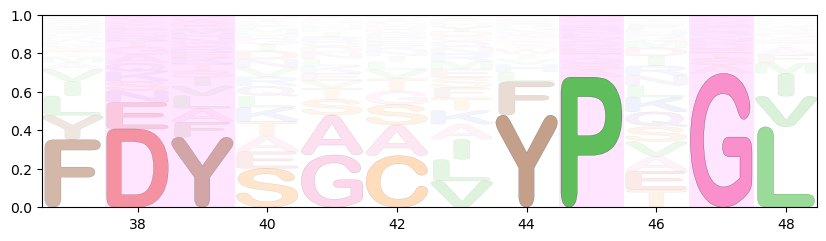

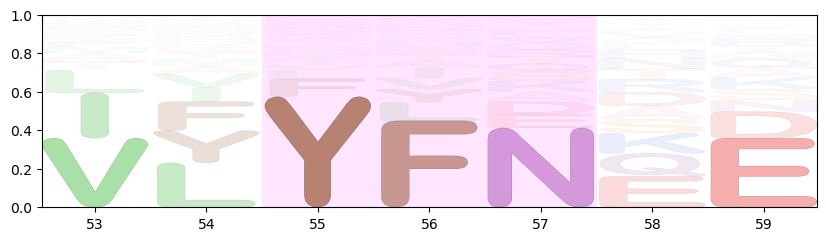

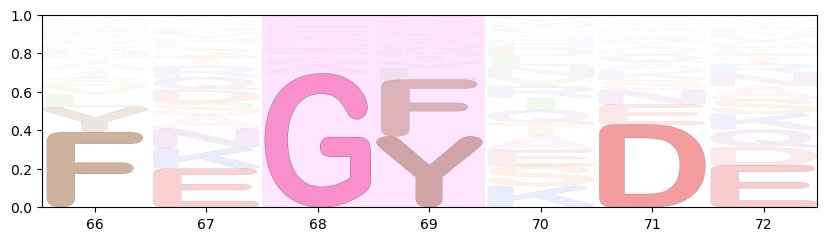

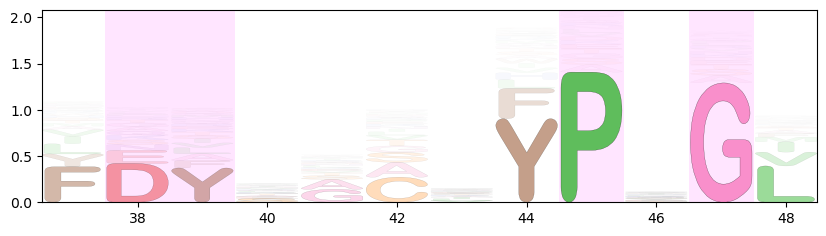

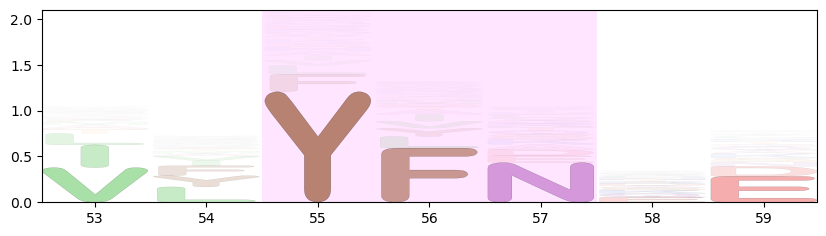

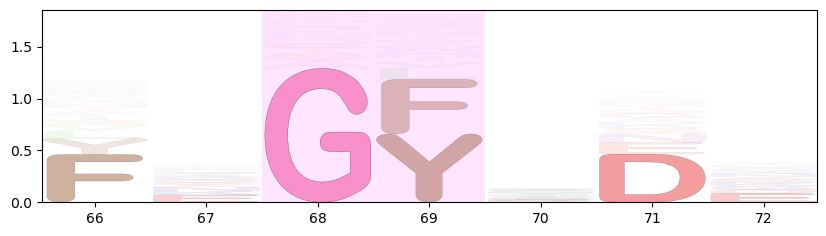

In [29]:
m1 = matrix_gc.iloc[34:46]
m2 = matrix_gc.iloc[50:57]
m3 = matrix_gc.iloc[63:70]

norm_motif1 = make_norm_logo(m1, shift=3, position=[38,39,45,47])
save_logo_svg(norm_motif1, "output_Logos", "GC1825_Motif1_normed")

norm_motif2 = make_norm_logo(m2, shift=3, position=[55,56,57])
save_logo_svg(norm_motif2, "output_Logos", "GC1825_Motif2_normed")

norm_motif3 = make_norm_logo(m3, shift=3, position=[68,69])
save_logo_svg(norm_motif3, "output_Logos", "GC1825_Motif3_normed")

unorm_motif1 = make_unorm_logo(m1, shift=3, position=[38,39,45,47])
save_logo_svg(unorm_motif1, "output_Logos", "GC1825_Motif1_unnormed")

unorm_motif2 = make_unorm_logo(m2, shift=3, position=[55,56,57])
save_logo_svg(unorm_motif2, "output_Logos", "GC1825_Motif2_unnormed")

unorm_motif3 = make_unorm_logo(m3, shift=3, position=[68,69])
save_logo_svg(unorm_motif3, "output_Logos", "GC1825_Motif3_unnormed")


# motif1 = make_logo(m1,shift=3)
# styled_motif1 = style_logo_magenta(motif1, ".HP.GV.")
# save_logo_svg(styled_motif1, "output_Logos", "GC_Motif1")


# motif2 = make_logo(m2,shift=3)
# styled_motif2 = style_logo_magenta(motif2, "..YFN.E")
# # styled_motif3 = style_logo_magenta(motif3, ".DY....YP.G.")
# save_logo_svg(styled_motif2, "output_Logos", "GC_Motif2")
# # save_logo_svg(styled_motif3, "output_Logos", "SIR_0168_Motif3")